In [36]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib
import matplotlib.pyplot as plt
import shapely

from shapely import wkt

import warnings
warnings.filterwarnings('ignore')

# Read Data

## PLZ Data

In [18]:
plz = pd.read_csv('../data/plz.csv').drop('Unnamed: 0', axis=1)
plz['geometry'] = plz['geometry'].apply(lambda geo: wkt.loads(geo))
plz.crs = "EPSG:4326"
plz = gpd.GeoDataFrame(plz)

## Bezirk Data

In [19]:
bezirke = gpd.read_file('../data/berliner_bezirke.geojson')
bezirke.crs = "EPSG:4326"

## Bounding Data

In [21]:
bounding_frame = pd.read_csv('../data/bounding_coordinates.csv').drop('Unnamed: 0', axis=1)
bounding_frame['geometry'] = bounding_frame['geometry'].apply(lambda geo: wkt.loads(geo))
bounding_frame.crs = "EPSG:4326"
bounding_frame = gpd.GeoDataFrame(bounding_frame)

## Berliner Mauer Data

In [45]:
berliner_mauer = gpd.read_file('/Users/alextruesdale/Documents/local/HU/thesis/data_files/berlin_wall.geojson')
berliner_mauer.crs = "EPSG:4326"

## Ringbahn Data

In [20]:
ringbahn = gpd.read_file('../data/berlin_sbahn_ring.geojson')
ringbahn.crs = "EPSG:4326"

In [40]:
plz_in_ring = [ringbahn.intersects(plz.iloc[i]['geometry']).values[0] for i in range(0, len(plz))]
plz['in_ring'] = plz_in_ring

in_ring = [ringbahn.contains(bounding_frame.iloc[i]['geometry']).values[0] for i in range(0, len(bounding_frame))]
bounding_frame['in_ring'] = in_ring

plz_ring = plz[plz['in_ring']]
bounding_frame_ring = bounding_frame[bounding_frame['in_ring']]

# Define Colourmap

In [31]:
from matplotlib import cm
class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = matplotlib.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [32]:
COL = MplColorHelper('GnBu', 0, 100)

In [33]:
colour_list = []
for i in range(0, 100):
    rgb_val = [val for val in COL.get_rgb(i)]
    rgb_val[-1] = 0
    colour_list.append(rgb_val)

In [34]:
my_cmap_none = matplotlib.colors.ListedColormap(colour_list, name='custom')

# Plot Maps

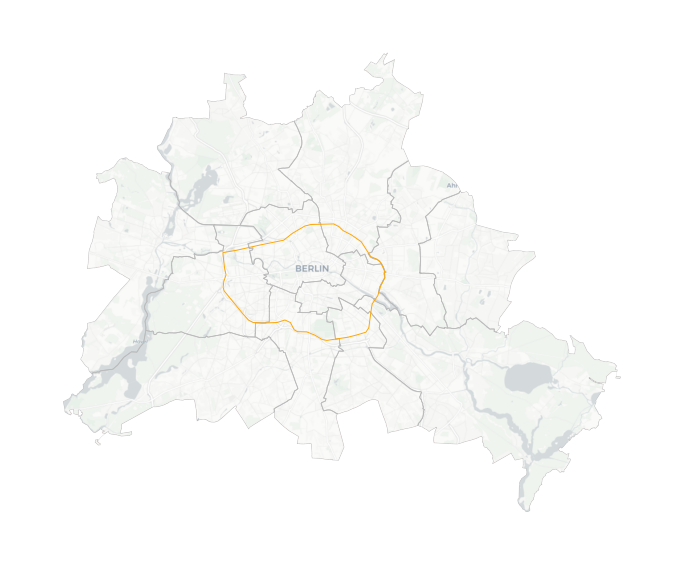

In [37]:
ax = gplt.webmap(
    plz,
    provider=ctx.providers.CartoDB.Positron,
    figsize=(12, 12),
    zorder=1
)

ax = gplt.kdeplot(
    bounding_frame,
    clip=plz,
    projection=gcrs.WebMercator(), 
    cmap=my_cmap_none,
    shade=True, 
    shade_lowest=True,
    figsize=(12, 12),
    zorder=2,
    ax=ax
)

gplt.polyplot(
    ringbahn, 
    linewidth=.95, 
    ax=ax,
    edgecolor='Orange',
    extent=shapely.geometry.box(*ringbahn.total_bounds).buffer(.007).bounds,
    zorder=3
)

gplt.polyplot(
    bezirke, 
    linewidth=.8, 
    ax=ax,
    edgecolor='#bbbbbb',
    zorder=1
)

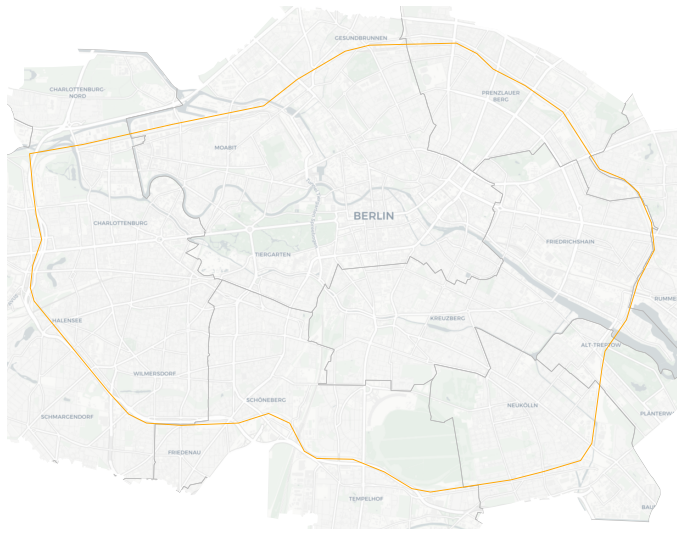

In [41]:
ax = gplt.webmap(
    plz_ring,
    provider=ctx.providers.CartoDB.Positron,
    figsize=(12, 12),
    zorder=1
)

gplt.kdeplot(
    bounding_frame,
    clip=plz_ring,
    projection=gcrs.WebMercator(), 
    cmap=my_cmap_none, 
    shade=True, 
    ax=ax,
    zorder=2
)

gplt.polyplot(
    bezirke, 
    linewidth=.7, 
    ax=ax,
    edgecolor='#bbbbbb',
    zorder=1
)

gplt.polyplot(
    ringbahn, 
    linewidth=.95, 
    ax=ax,
    edgecolor='Orange',
    extent=shapely.geometry.box(*ringbahn.total_bounds).buffer(.007).bounds,
    zorder=3
)

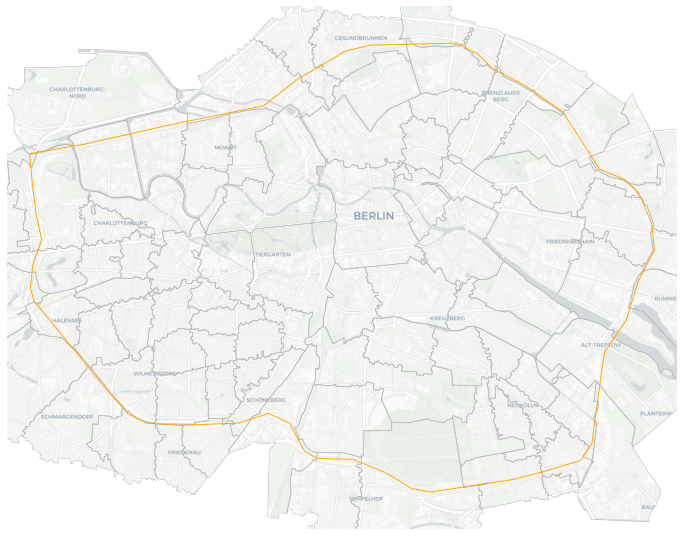

In [51]:
ax = gplt.webmap(
    plz_ring,
    provider=ctx.providers.CartoDB.Positron,
    figsize=(12, 12),
    zorder=1
)

gplt.kdeplot(
    bounding_frame,
    clip=plz_ring,
    projection=gcrs.WebMercator(), 
    cmap=my_cmap_none, 
    shade=True, 
    ax=ax,
    zorder=2
)

gplt.polyplot(
    plz, 
    linewidth=.7, 
    ax=ax,
    edgecolor='#bbbbbb',
    zorder=1
)

gplt.polyplot(
    ringbahn, 
    linewidth=.95, 
    ax=ax,
    edgecolor='Orange',
    extent=shapely.geometry.box(*ringbahn.total_bounds).buffer(.007).bounds,
    zorder=3
)

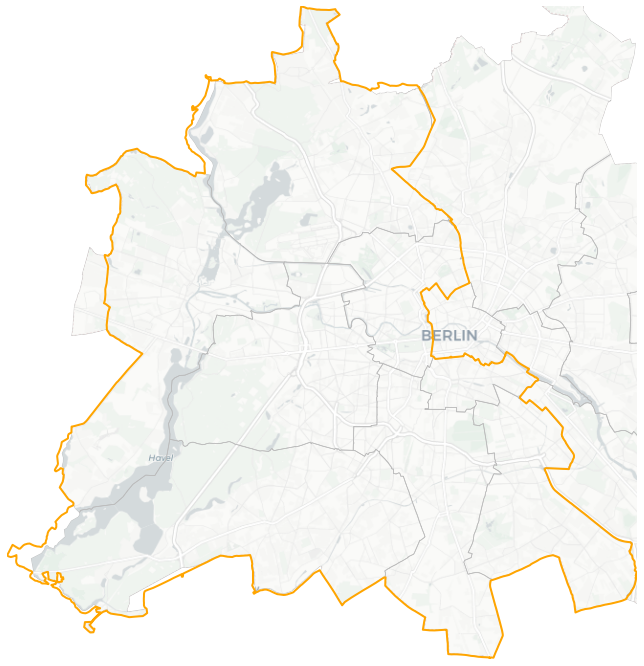

In [50]:
ax = gplt.webmap(
    plz,
    provider=ctx.providers.CartoDB.Positron,
    figsize=(12, 12),
    zorder=1
)

gplt.kdeplot(
    bounding_frame,
    clip=plz,
    projection=gcrs.WebMercator(), 
    cmap=my_cmap_none, 
    shade=True, 
    shade_lowest=True,
    figsize=(12, 12),
    zorder=2,
    ax=ax
)

gplt.polyplot(
    bezirke, 
    linewidth=.7, 
    ax=ax,
    edgecolor='#bbbbbb',
    zorder=1
)

gplt.polyplot(
    berliner_mauer, 
    linewidth=2, 
    ax=ax,
    edgecolor='Orange',
    extent=berliner_mauer.total_bounds,
    zorder=3
)